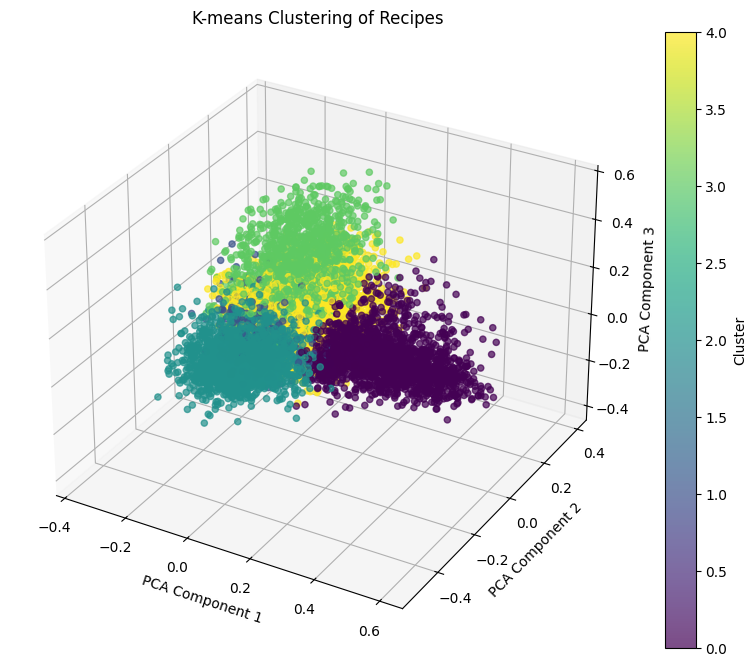

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_json("./data/recipes.json")

# Ensure the ingredients column is a list of ingredients per recipe
df['ingredients'] = df['ingredients'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Step 1: Vectorize the ingredients (convert the list of ingredients to a string)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['ingredients'])

# Step 2: Apply K-means clustering to group the recipes
n_clusters = 5  # You can change this based on the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cuisine'] = kmeans.fit_predict(X)

# Step 3: Assign unique letters as cuisine labels
unique_labels = [chr(i) for i in range(65, 65 + n_clusters)]  # Generate letters A, B, C, etc.
df['cuisine'] = df['cuisine'].map(lambda x: unique_labels[x])

# Step 4: Dimensionality Reduction for Visualization (PCA or t-SNE)
# We use PCA for dimensionality reduction to 2D or 3D
pca = PCA(n_components=0.8)  # 3 components for 3D visualization
X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense array

# Step 5: Plotting clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the PCA components (x, y, z coordinates)
x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]

# Extract the cluster labels
clusters = df['cuisine']
#print(clusters)

# Extract the PCA components (x, y, z coordinates)
x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]

# Extract the cluster labels
clusters = df['cuisine']

# Scatter plot
scatter = ax.scatter(x, y, z, c=clusters.map({label: i for i, label in enumerate(unique_labels)}), 
                     cmap='viridis', marker='o', alpha=0.7)

# Set plot titles and labels
ax.set_title("K-means Clustering of Recipes")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.colorbar(scatter, label='Cluster')

# Show plot with interactive mode enabled
plt.show()
# Optionally, save the DataFrame with the new 'cuisine' column
df.to_csv('recipes_with_cuisine.csv', index=False)
